menghapus kolom= 'Holiday_ID','holiday', 'school'
epochs=20
batch_size=32
optimazer=AdamW
learning rate=0.0001
jumlah layer= 6

n_steps_in = 30  # Window size
n_steps_out = 1  # Forecast horizon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/data/train.csv")
train.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    43775 non-null  object 
 1   nat_demand  43775 non-null  float64
 2   T2M_toc     43775 non-null  float64
 3   QV2M_toc    43775 non-null  float64
 4   TQL_toc     43775 non-null  float64
 5   W2M_toc     43775 non-null  float64
 6   T2M_san     43775 non-null  float64
 7   QV2M_san    43775 non-null  float64
 8   TQL_san     43775 non-null  float64
 9   W2M_san     43775 non-null  float64
 10  T2M_dav     43775 non-null  float64
 11  QV2M_dav    43775 non-null  float64
 12  TQL_dav     43775 non-null  float64
 13  W2M_dav     43775 non-null  float64
 14  Holiday_ID  43775 non-null  int64  
 15  holiday     43775 non-null  int64  
 16  school      43775 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 5.7+ MB


In [ ]:
predict = pd.read_csv("/content/drive/MyDrive/data/Predict_Jan.csv",)
predict.head()

,datetime,nat_demand
0,01-01-2020 00:00,1032.2630
1,01-01-2020 01:00,1017.5806
2,01-01-2020 02:00,1000.2797
3,01-01-2020 03:00,987.2383
4,01-01-2020 04:00,970.3667


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/data/Test_Jan.csv")
test.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,01-01-2020 00:00,0,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,0.068054,3.737708,1,1,0
1,01-01-2020 01:00,0,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,0.080109,3.591759,1,1,0
2,01-01-2020 02:00,0,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,0.094757,3.704177,1,1,0
3,01-01-2020 03:00,0,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,0.107086,3.936592,1,1,0
4,01-01-2020 04:00,0,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,0.113800,4.088643,1,1,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    744 non-null    object 
 1   nat_demand  744 non-null    int64  
 2   T2M_toc     744 non-null    float64
 3   QV2M_toc    744 non-null    float64
 4   TQL_toc     744 non-null    float64
 5   W2M_toc     744 non-null    float64
 6   T2M_san     744 non-null    float64
 7   QV2M_san    744 non-null    float64
 8   TQL_san     744 non-null    float64
 9   W2M_san     744 non-null    float64
 10  T2M_dav     744 non-null    float64
 11  QV2M_dav    744 non-null    float64
 12  TQL_dav     744 non-null    float64
 13  W2M_dav     744 non-null    float64
 14  Holiday_ID  744 non-null    int64  
 15  holiday     744 non-null    int64  
 16  school      744 non-null    int64  
dtypes: float64(12), int64(4), object(1)
memory usage: 98.9+ KB


# Visualization

In [ ]:
train.index = pd.to_datetime(train['datetime'], format='%d-%m-%Y %H:%M')
predict.index = pd.to_datetime(predict['datetime'], format='%d-%m-%Y %H:%M')

In [ ]:
temp_train = train['nat_demand']
temp_test = predict['nat_demand']


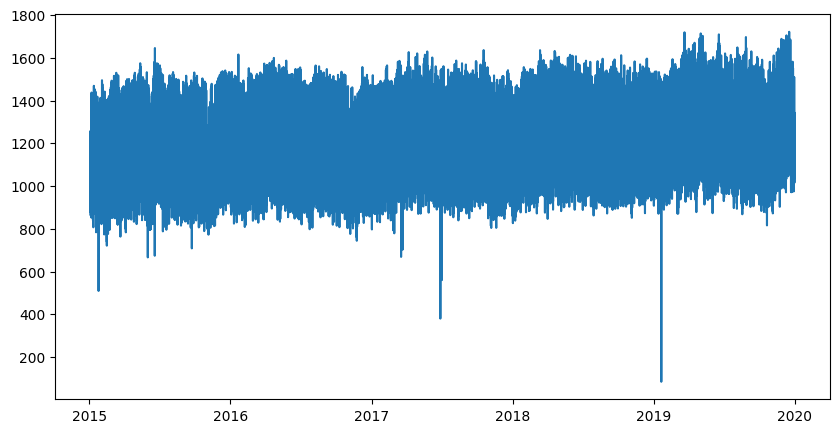

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

timesteps_test = []
nat_demand_test = []

with open("/content/drive/MyDrive/data/train.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps_test.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
        nat_demand_test.append(float(line[1]))

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(timesteps_test, nat_demand_test)
plt.show()


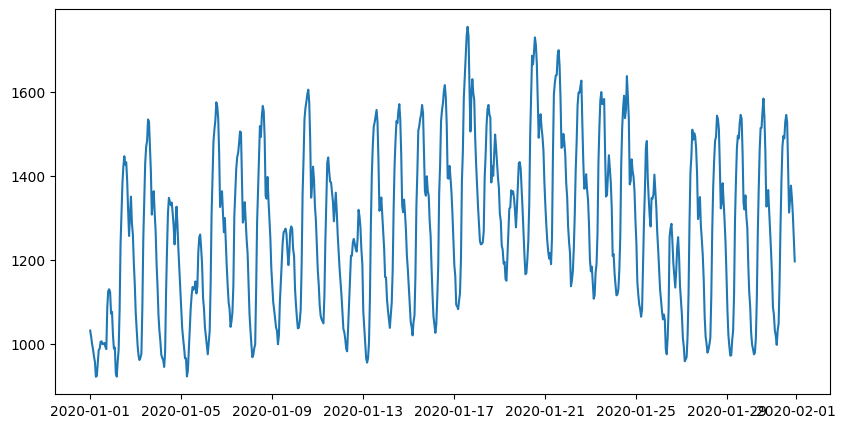

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

timesteps_test = []
nat_demand_test = []

with open("/content/drive/MyDrive/data/Predict_Jan.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps_test.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
        nat_demand_test.append(float(line[1]))

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(timesteps_test, nat_demand_test)

# # Display the plot
# plt.show()


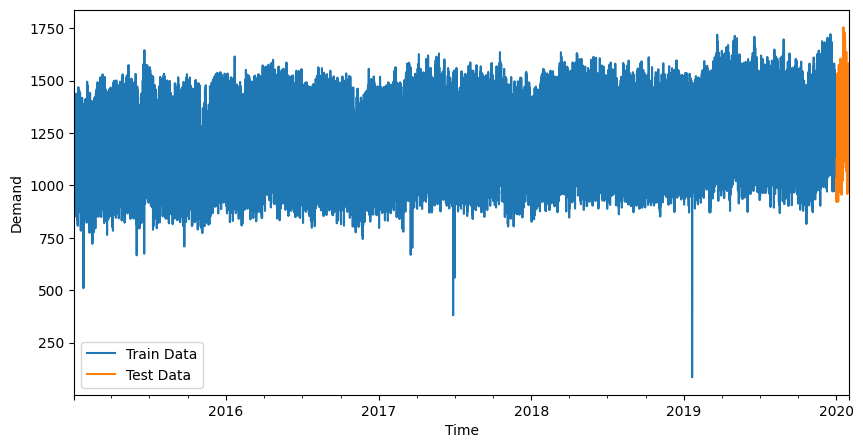

In [ ]:
import matplotlib.pyplot as plt
# Plotting train data
temp_train.plot(figsize=(10, 5), label='Train Data')
# Plotting test data ]
temp_test.plot(label='Test Data')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [ ]:
train.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

# Preprocessing

In [ ]:
col=['Holiday_ID','holiday', 'school'] # dihapus karena bernilai 0 semua dan kurang berpengaruh jika digunakan dalam proses prediksi
train= train.drop(columns=col)
test= test.drop(columns=col)

In [ ]:
# fitur dan target train
fitur_train = train.drop(['datetime', 'nat_demand'], axis = 1).values
target_train = train['nat_demand'].values

# fitur dan target test
fitur_test = test.drop(['datetime', 'nat_demand'], axis = 1).values
target_test = predict['nat_demand'].values

In [ ]:
train.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav
datetime,,,,,,,,,,,,,,
2015-01-03 01:00:00,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148
2015-01-03 02:00:00,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471
2015-01-03 03:00:00,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184
2015-01-03 04:00:00,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621
2015-01-03 05:00:00,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi Data
scaler = MinMaxScaler()
scaled_fitur_train = scaler.fit_transform(fitur_train)
scaled_target_train = scaler.fit_transform(target_train.reshape(-1, 1))
scaled_fitur_test = scaler.fit_transform(fitur_test)
scaled_target_test = scaler.fit_transform(target_test.reshape(-1, 1))

In [ ]:
def prepare_data_with_window(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
import numpy as np

# Define window size and forecast horizon
n_steps_in = 48  # Window size
n_steps_out = 1  # Forecast horizon

# Prepare data
X_train, y_train = prepare_data_with_window(scaled_fitur_train, n_steps_in, n_steps_out)
X_test, y_test = prepare_data_with_window(scaled_fitur_test, n_steps_in, n_steps_out)

In [ ]:
# Reshape input [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW
import matplotlib.pyplot as plt
import tensorflow as tf

# Pembangunan Model RNN

model = Sequential()

model.add(SimpleRNN(128, activation='relu', return_sequences=True,
              input_shape=(n_steps_in, X_train.shape[2])))
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 48, 128)           18048     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 30929 (120.82 KB)
Trainable params: 30929 (120.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=64,verbose=1, validation_split=0.2)

Epoch 1/20
547/547 [==============================] - 52s 88ms/step - loss: 0.0024 - val_loss: 7.9722e-04
Epoch 2/20
547/547 [==============================] - 48s 87ms/step - loss: 5.6150e-04 - val_loss: 4.8078e-04
Epoch 3/20
547/547 [==============================] - 49s 90ms/step - loss: 3.7274e-04 - val_loss: 3.4601e-04
Epoch 4/20
547/547 [==============================] - 49s 89ms/step - loss: 2.8937e-04 - val_loss: 3.2460e-04
Epoch 5/20
547/547 [==============================] - 47s 86ms/step - loss: 2.3835e-04 - val_loss: 2.2047e-04
Epoch 6/20
547/547 [==============================] - 47s 86ms/step - loss: 2.0645e-04 - val_loss: 1.9288e-04
Epoch 7/20
547/547 [==============================] - 47s 86ms/step - loss: 1.8157e-04 - val_loss: 1.7618e-04
Epoch 8/20
547/547 [==============================] - 47s 86ms/step - loss: 1.6160e-04 - val_loss: 1.5465e-04
Epoch 9/20
547/547 [==============================] - 49s 89ms/step - loss: 1.4624e-04 - val_loss: 1.4340e-04
Epoch 10/20
54

# Chart Perbandingan Prediksi dengan Data Actual

In [ ]:
y_pred = model.predict(X_test)

22/22 [==============================] - 0s 10ms/step


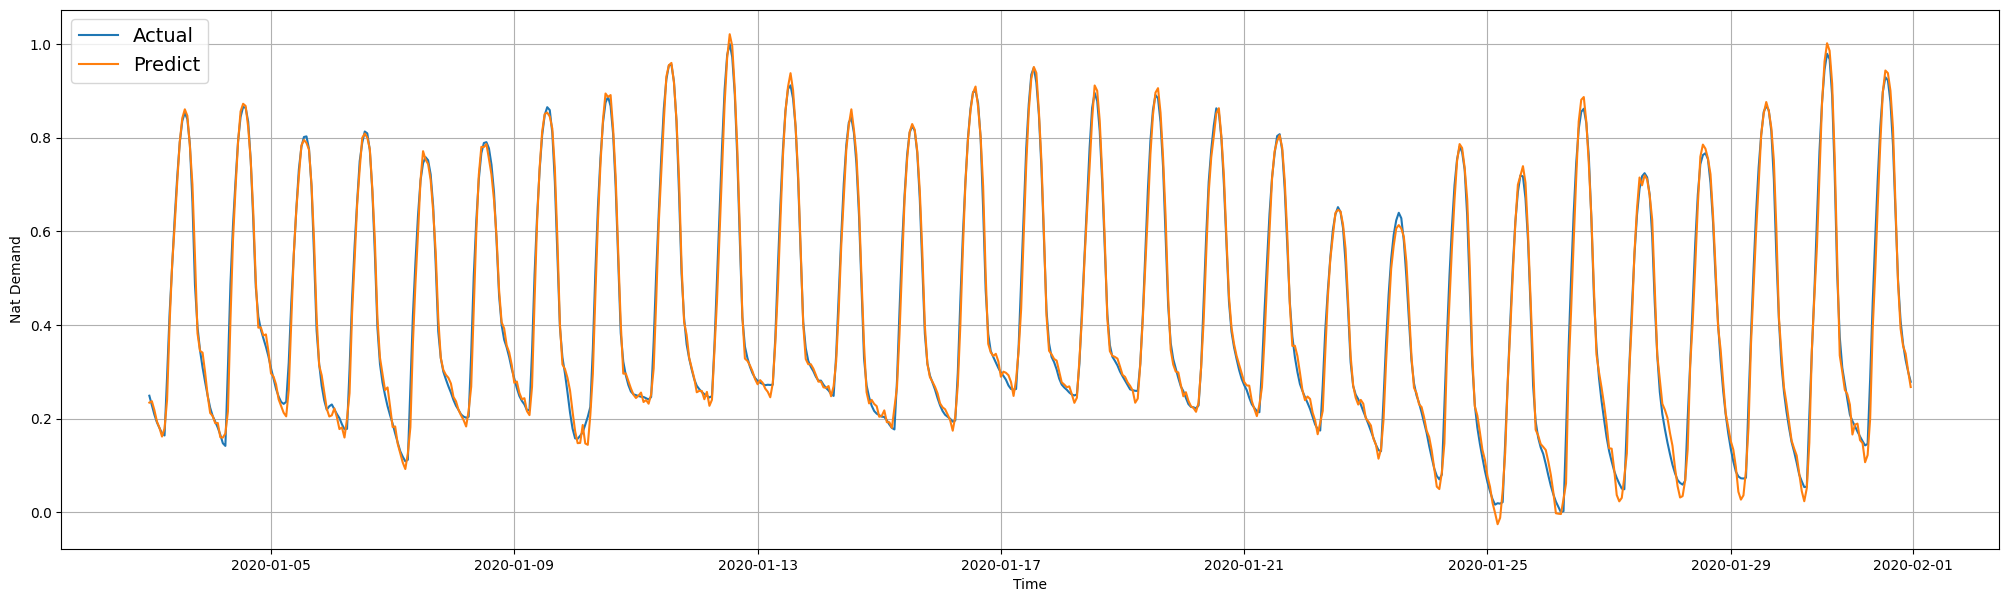

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Nat Demand")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

#     temp_train = train['nat_demand']
# temp_test = predict['nat_demand']

plt.figure(figsize=(25, 7))
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_test.flatten(), format='-', label="Actual")
plot_time_series(timesteps=timesteps_test[-len(X_test):], values=y_pred.flatten(), format='-', label="Predict")

